### Import all required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split

### Load dataset

Since this dataset is from Kaggle, it will require Kaggle API to able to download 

In [2]:
# You will  need kaggle api to download the dataset
# you will also need to uncomment and run the following line the first time if you dont have the dataset
#  ! pip install kaggle
# ! mkdir -p ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json



In [3]:
# ! kaggle datasets download -d shubhambathwal/flight-price-prediction

In [4]:
# from zipfile import ZipFile
# filename = 'flight-price-prediction.zip'
# with ZipFile(filename, 'r') as zip:
#     zip.extractall()
#     print('Done!')

In [5]:
df = pd.read_csv('Clean_Dataset.csv')
df.head(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [6]:
#dropping the unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])

In [7]:
# quick information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.describe(include='all')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


<Axes: xlabel='price'>

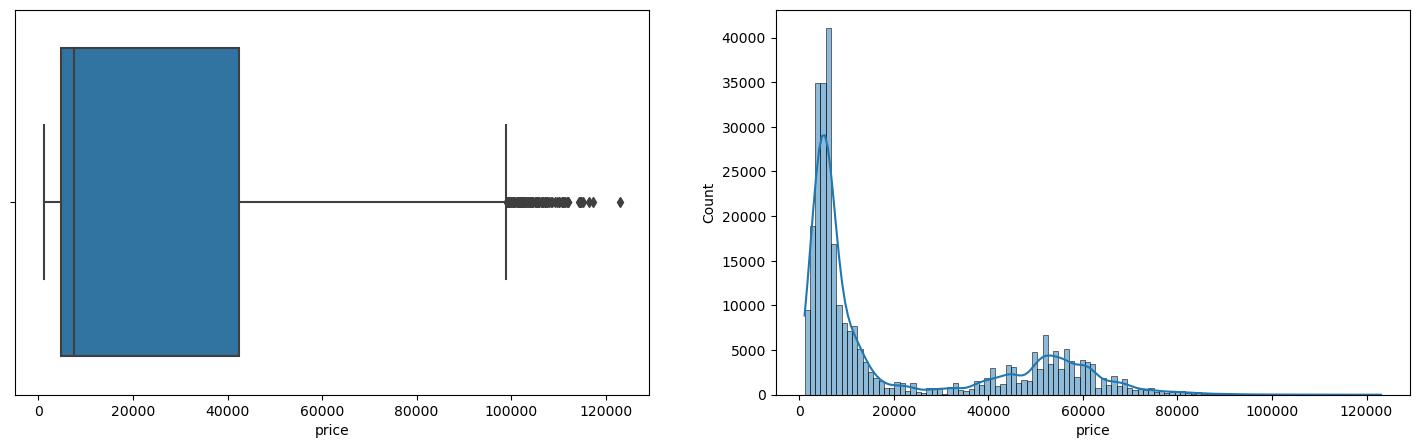

In [10]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

In [11]:
#  pairwise correlation of 3 columns duration, days left and price
df[['duration', 'days_left', 'price']].corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [12]:
df.shape


(300153, 11)

In [13]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

[Text(0, 0, 'Indigo'),
 Text(1, 0, 'Air_India'),
 Text(2, 0, 'GO_FIRST'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Vistara'),
 Text(5, 0, 'AirAsia')]

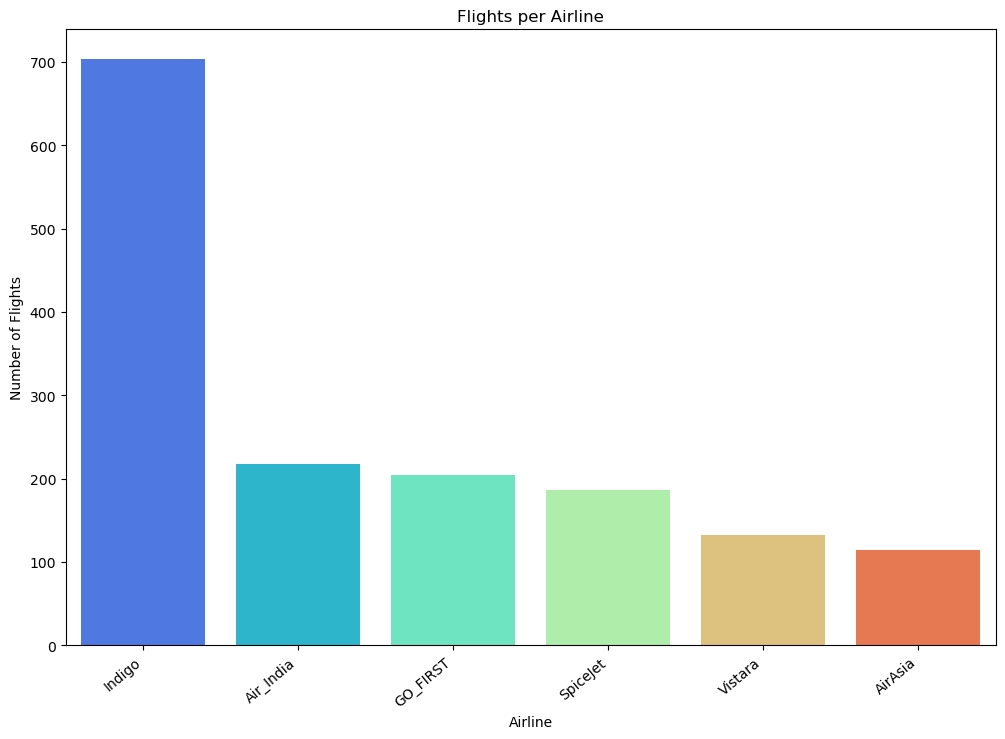

In [14]:
# plot the number of flights per airline
fig, ax = plt.subplots(figsize=(12, 8))
airline_counts = df1.airline.value_counts()
ax = sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='rainbow')

ax.set(xlabel='Airline', 
       ylabel='Number of Flights',
       title='Flights per Airline')
       

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [15]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

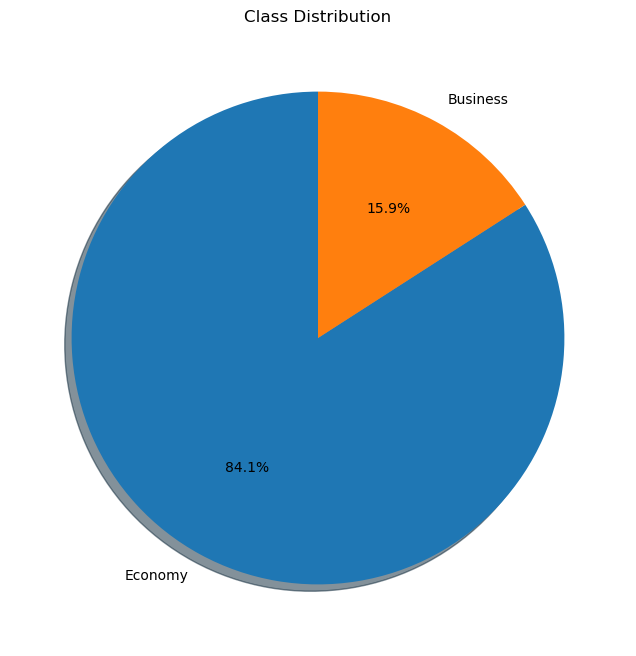

In [16]:
#pie chart for class distribution
data = df2['class'].value_counts()
labels = df2['class'].unique()
plt.figure(figsize=(12,8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Class Distribution')
plt.show()

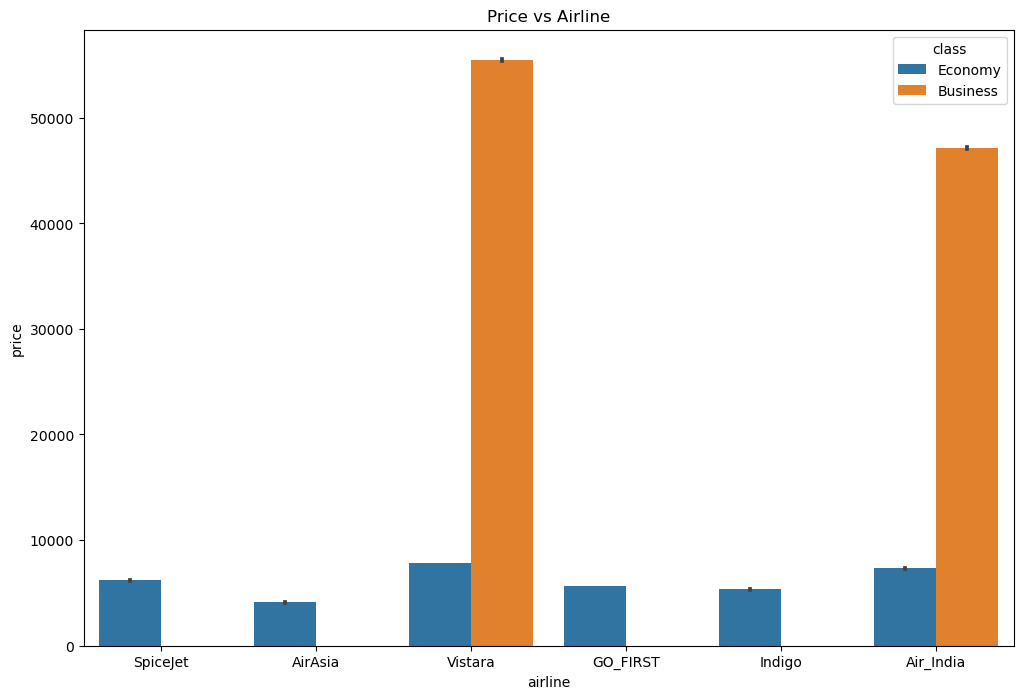

In [17]:
# price vary with different airlines and class
plt.figure(figsize=(12,8))
sns.barplot(x='airline', y='price', hue='class', data=df)
plt.title('Price vs Airline')
plt.show()


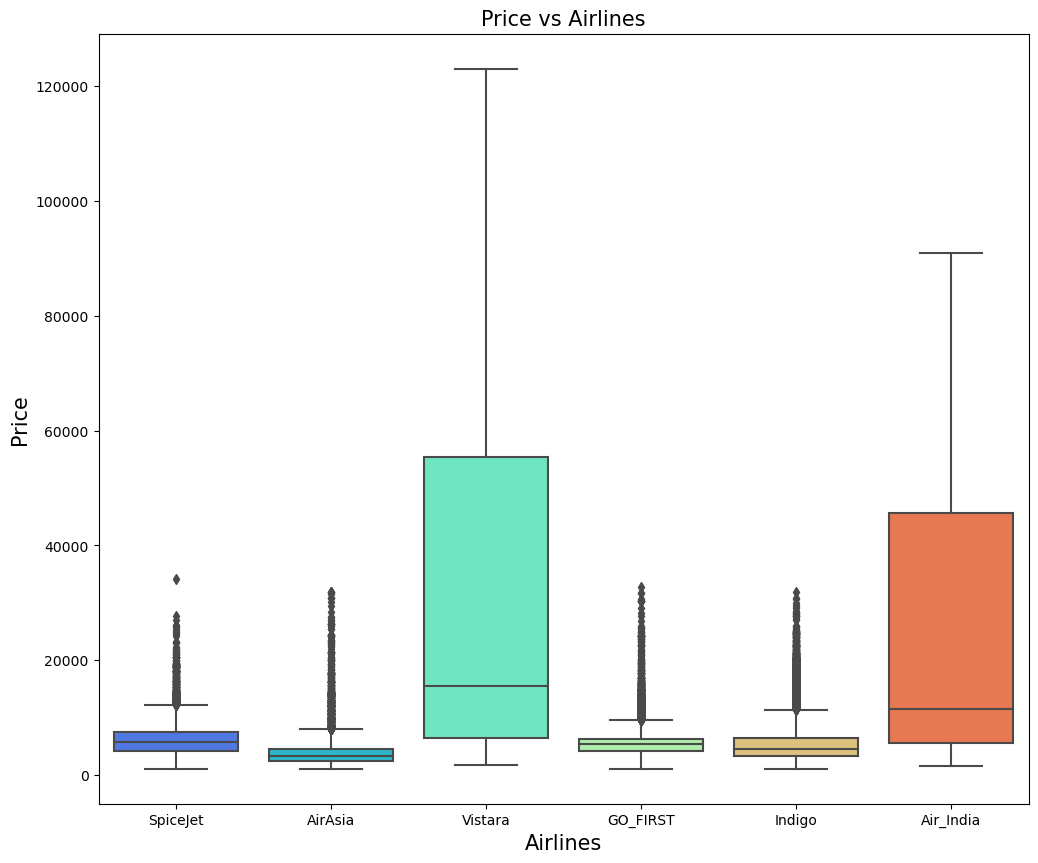

In [18]:
# price vary with different airlines
plt.figure(figsize=(12,10))
sns.boxplot(x='airline',y='price',data=df, palette='rainbow')
plt.title('Price vs Airlines',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

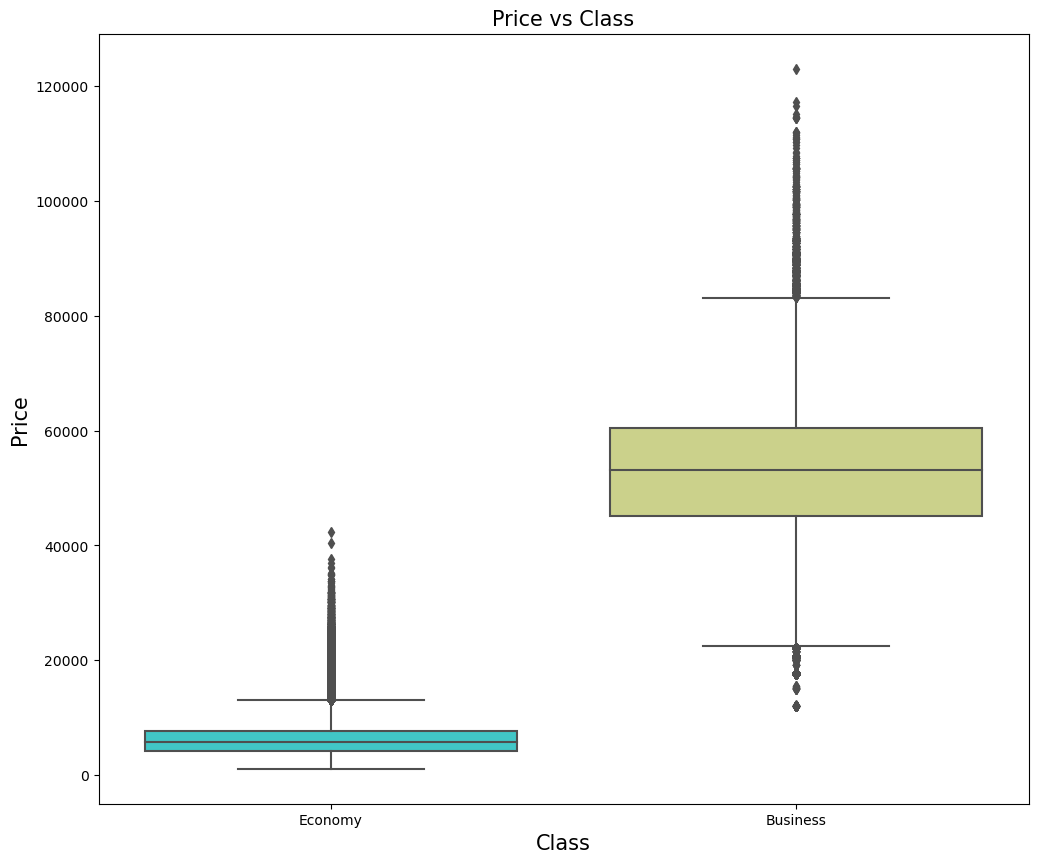

In [19]:
# price vary with different classes
plt.figure(figsize=(12,10))
sns.boxplot(x='class',y='price',data=df, palette='rainbow')
plt.title('Price vs Class',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

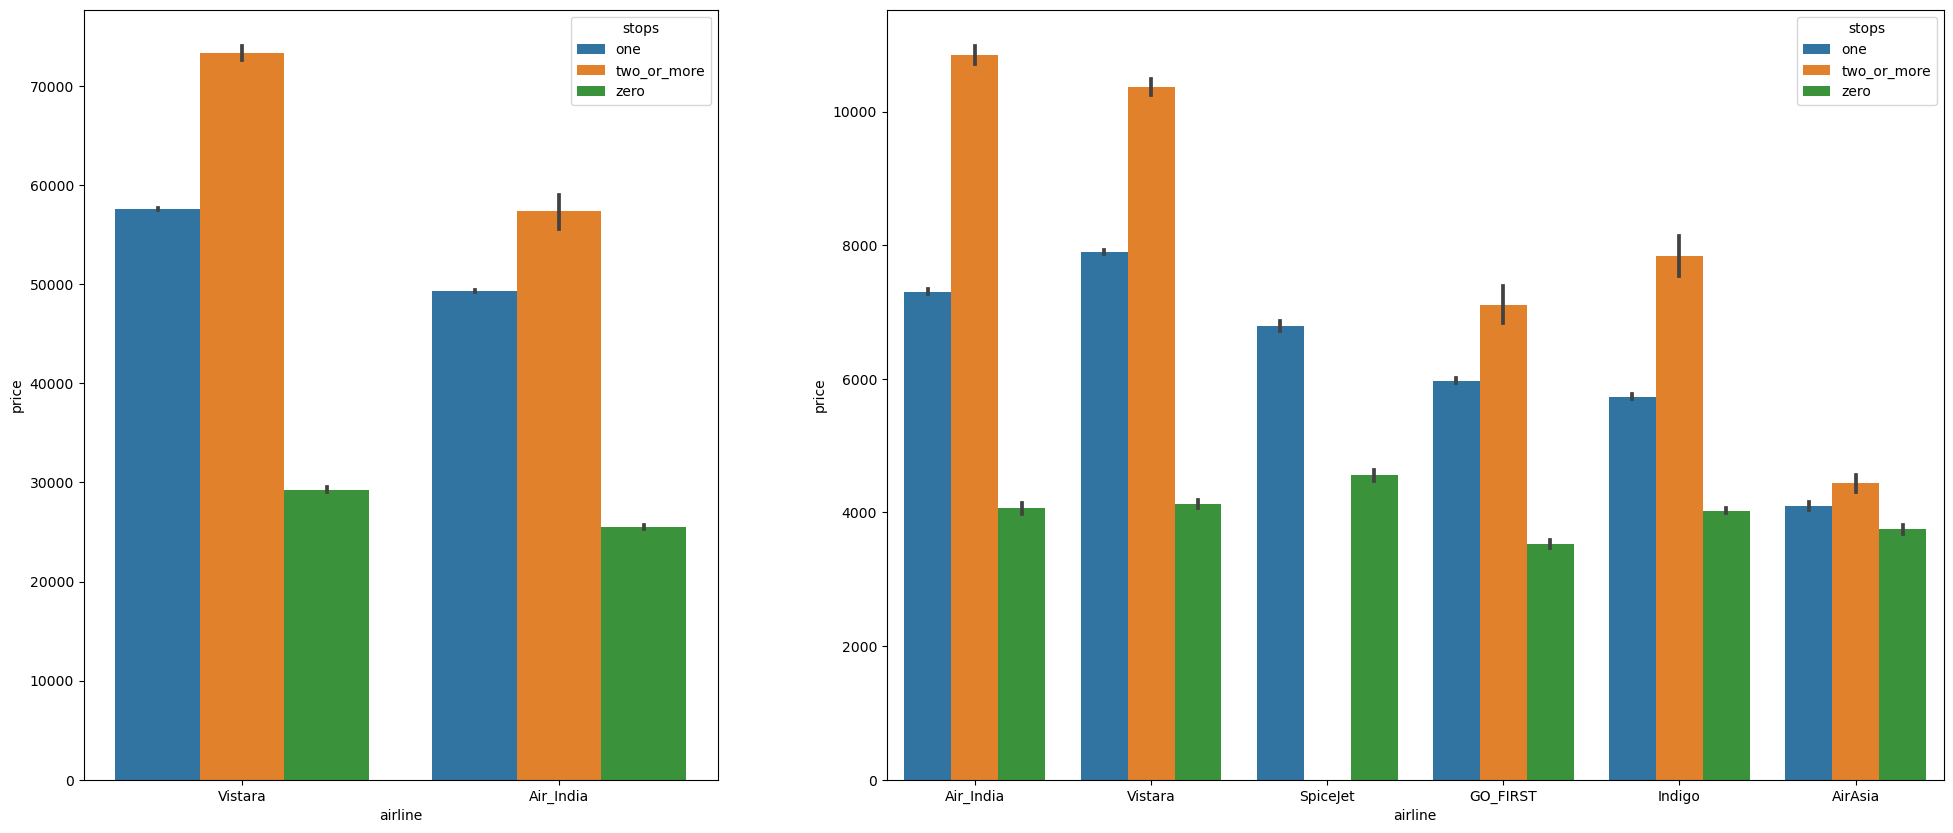

In [33]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 5]},figsize=(24,10))

# Plot on axes 1 
sns.barplot(x='airline', y='price', hue='stops', 
            data=df.loc[df['class']=='Business'].sort_values('price', ascending=False),
            ax=ax1)

# Plot on axes 2
sns.barplot(x='airline', y='price', hue='stops',
            data=df.loc[df['class']=='Economy'].sort_values('price', ascending=False), 
            ax=ax2)

plt.show()


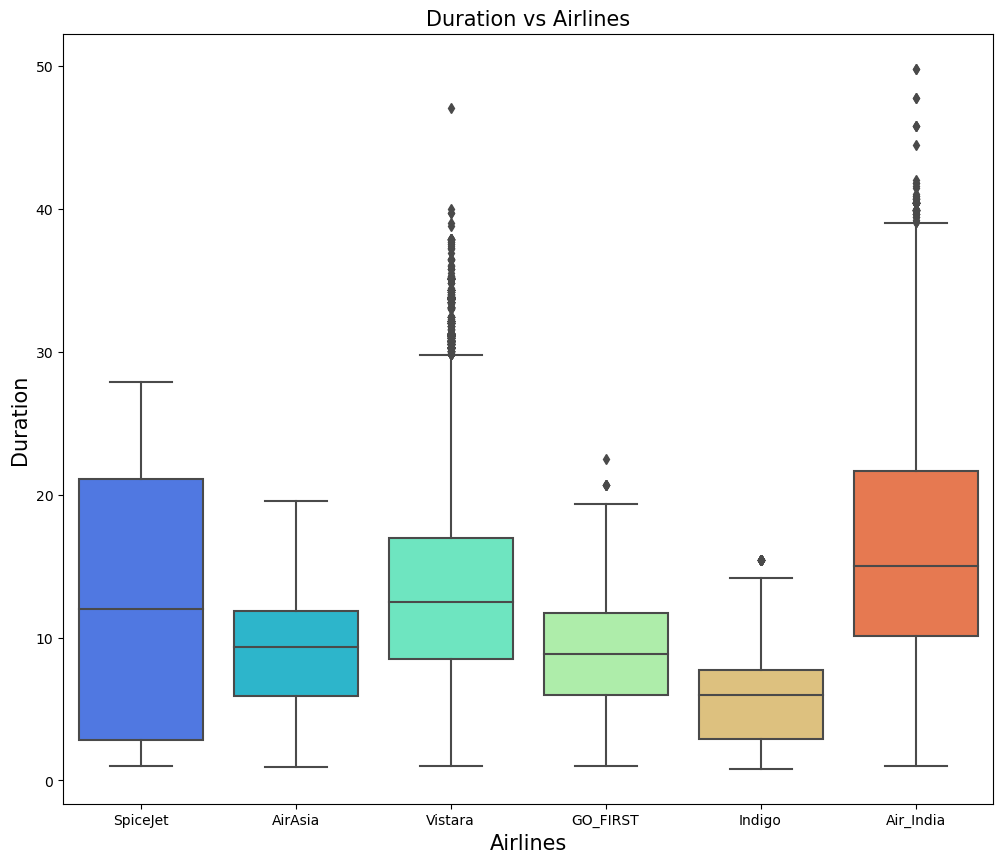

In [21]:
# price vary with different airlines
plt.figure(figsize=(12,10))
sns.boxplot(x='airline',y='duration',data=df, palette='rainbow')
plt.title('Duration vs Airlines',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Duration',fontsize=15)
plt.show()


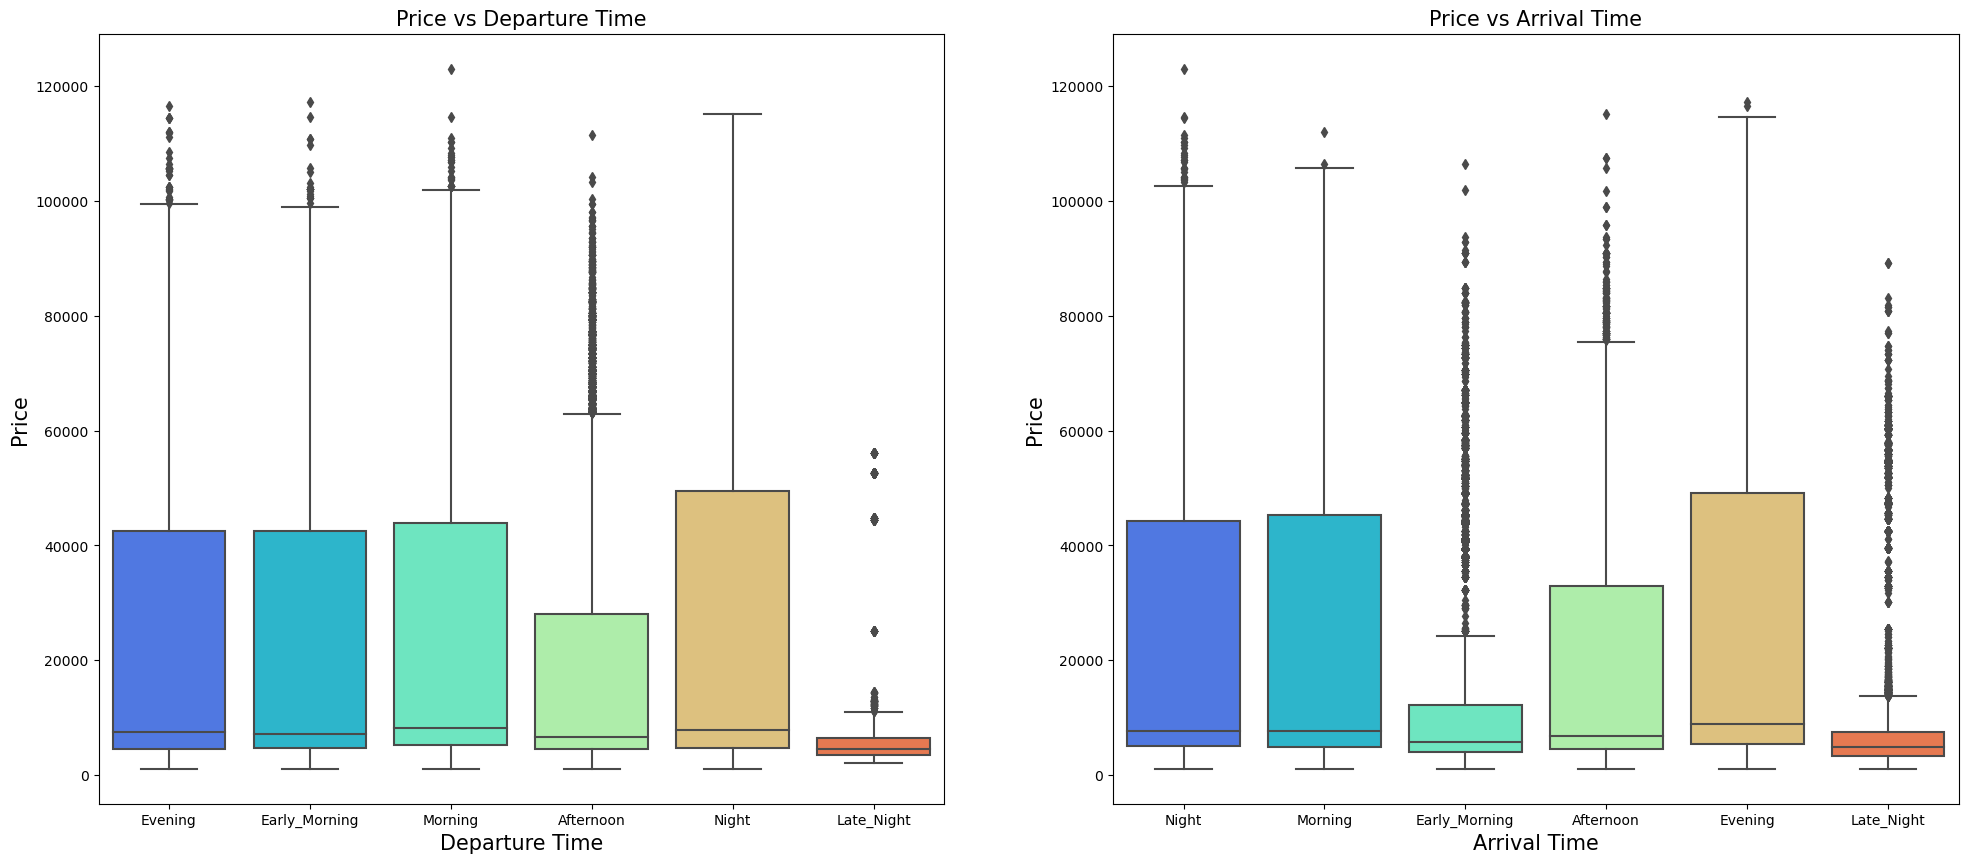

In [22]:
# price vary with different Departure time and Arrival time
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df, palette='rainbow')
plt.title('Price vs Departure Time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df, palette='rainbow')
plt.title('Price vs Arrival Time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

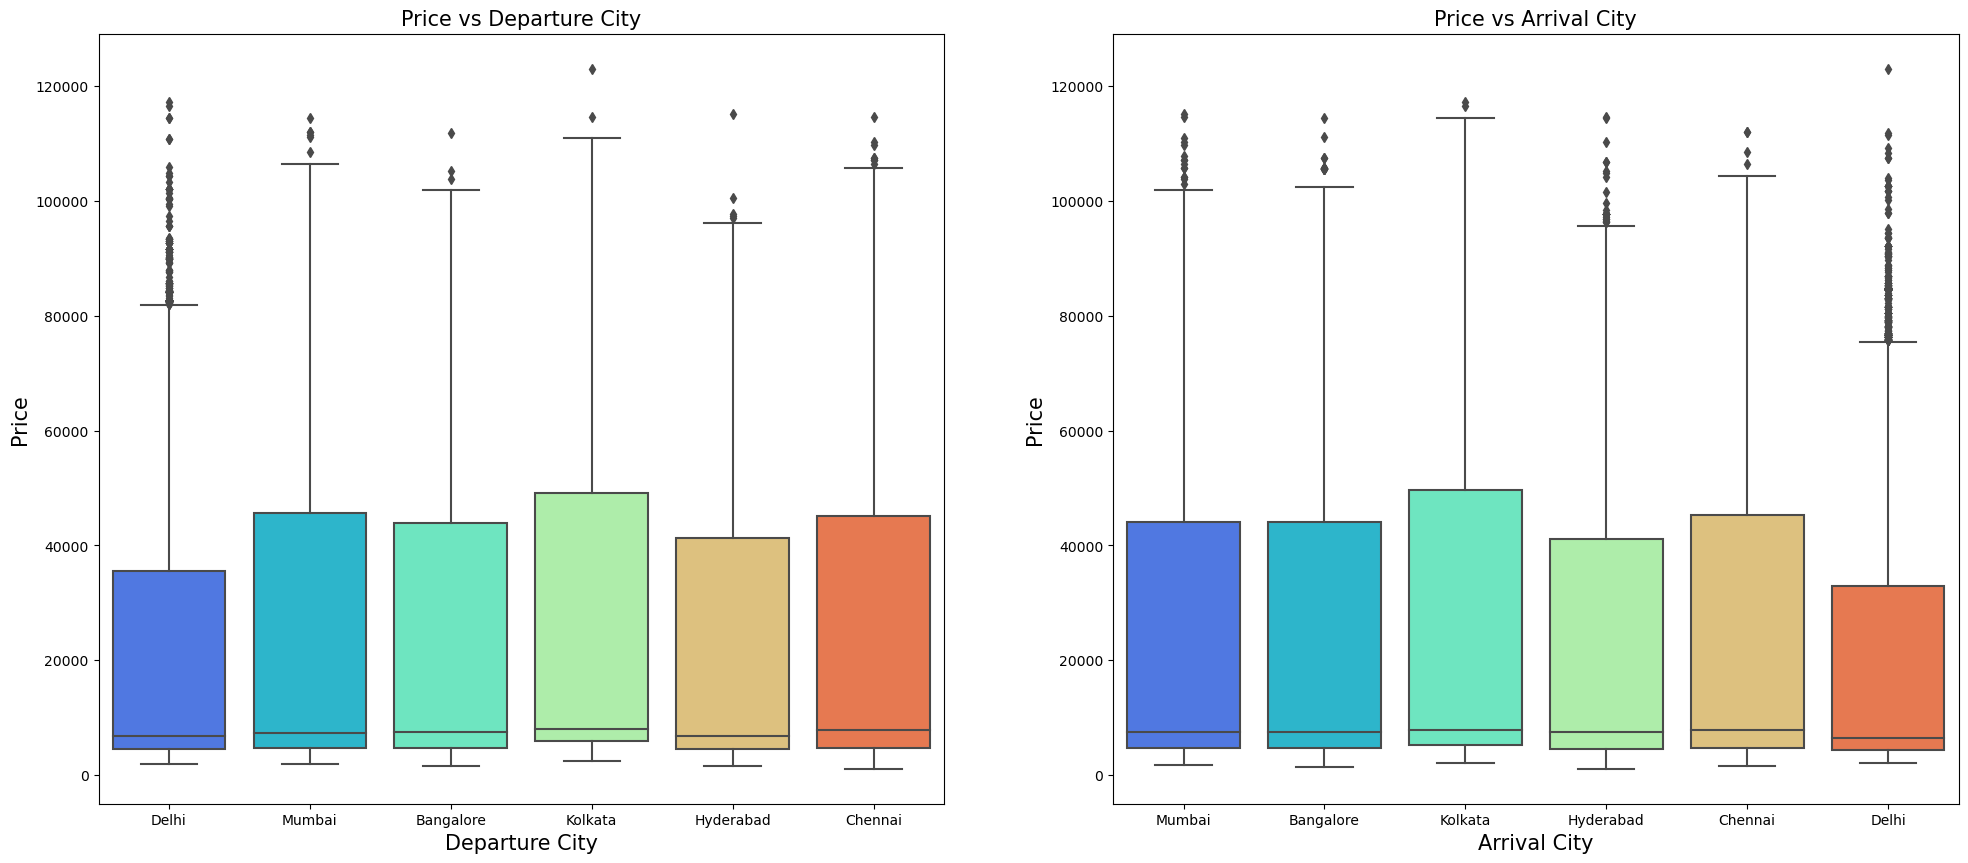

In [23]:
# price vary with different Departure city and Arrival city
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df, palette='rainbow')
plt.title('Price vs Departure City',fontsize=15)
plt.xlabel('Departure City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df, palette='rainbow')
plt.title('Price vs Arrival City',fontsize=15)
plt.xlabel('Arrival City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

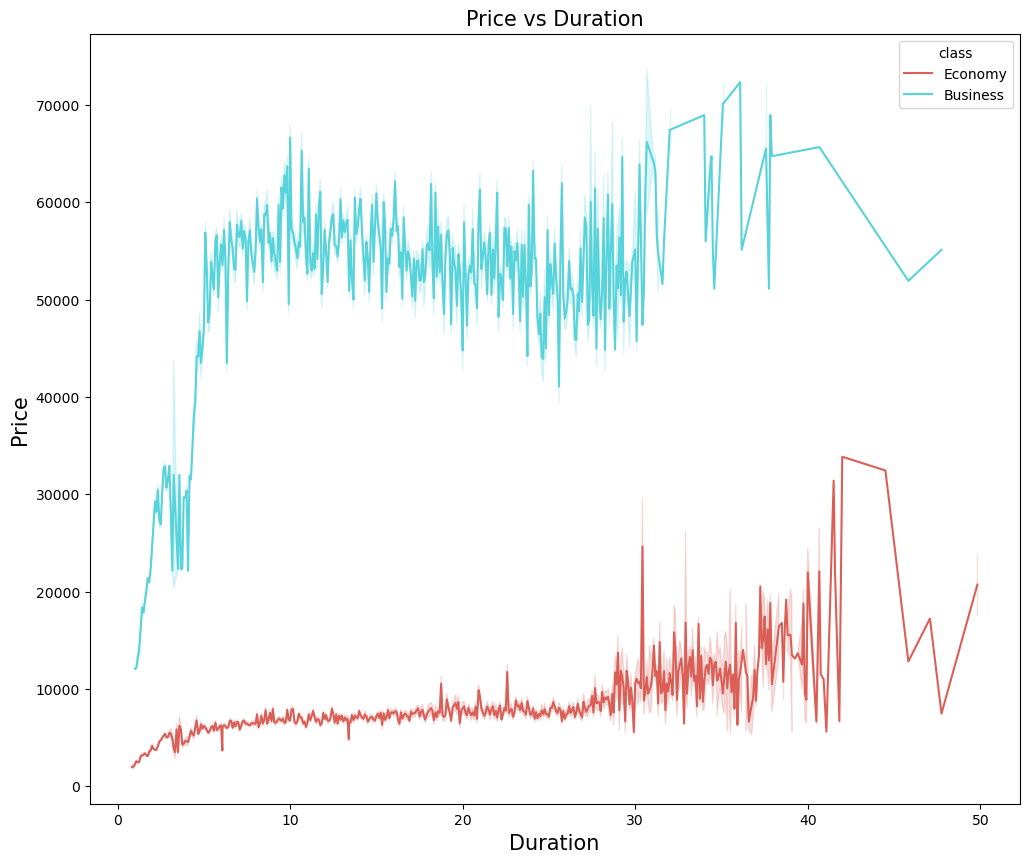

In [24]:
# price vary with flight duration
plt.figure(figsize=(12,10))
sns.lineplot(x='duration',y='price',data=df,hue='class', palette='hls')
plt.title('Price vs Duration',fontsize=15)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()